------------

# Комментарии

Привет, Сергей!

Я проверила твою работу и оставила в ней комментарии. Комментарии оформлены в таких ячейках и вставлены сразу после ячейки или группы ячеек, к которым относятся. А в самом низу общие комментарии по работе. Надеюсь, тебе все будет понятно :)

Ты справился с проектом и достаточно хорошо освоил материал этого модуля :) Пройдись по комментариям и постарайся их учесть в следующих проектах :)

------------

Шаг 1. Открыть файл с данными и изучить общую информацию. Подготовить данные
-----

------------

# Этап 1

Просмотрим данные из DF о играх /datasets/games_data.csv

Данные о возрастном рейтинге ESRB /datasets/rating.csv 

------------

In [17]:
from scipy import stats as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
data_games = pd.read_csv('/datasets/games_data.csv')
data_games.head()

,platform,sales_year,genre,online,offline,critic_score,user_score,rating,game_id
0,PS3,2017.0,Action,702.0,909.0,97.0,8.2,M,20838
1,X360,2017.0,Action,966.0,514.0,97.0,8.1,M,48673
2,X360,2017.0,Shooter,904.0,424.0,88.0,3.4,M,17801
3,PS4,2015.0,Shooter,603.0,586.0,NaN,NaN,NaN,12200
4,3DS,2017.0,Role-Playing,528.0,419.0,NaN,NaN,NaN,11432


In [18]:
data_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4026 entries, 0 to 4025
Data columns (total 9 columns):
platform        4026 non-null object
sales_year      4026 non-null float64
genre           4026 non-null object
online          4026 non-null float64
offline         4026 non-null float64
critic_score    1812 non-null float64
user_score      2382 non-null object
rating          2315 non-null object
game_id         4026 non-null int64
dtypes: float64(4), int64(1), object(4)
memory usage: 283.2+ KB


In [19]:
data_ESRB = pd.read_csv('/datasets/rating.csv')
data_ESRB.head(8)

,rating_type,decryption
0,E,Для всех
1,M,От 17 лет
2,T,Подросткам 13—19 лет
3,E10+,Для всех старше 10 лет
4,K-A,Для всех(до 1998 года)
5,AO,Только для взрослых
6,EC,Для детей младшего возраста
7,RP,Рейтинг ожидается


In [20]:
data_ESRB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
rating_type    8 non-null object
decryption     8 non-null object
dtypes: object(2)
memory usage: 208.0+ bytes


_Как видно в данных об играх пропущены следующие: __critic_score, user_score, rating__._

Проверим данные из таблицы на наличие дубликатов при этом предварительно переведем все данные в столбцах _platform, genre, rating_ в строчный вид 

In [21]:
data_games['platform'] = data_games['platform'].str.lower()
data_games['genre'] = data_games['genre'].str.lower()
data_games['rating'] = data_games['rating'].str.lower()


------------

# Комментарии

Хорошо :)

Почему ты решаешь привести значения к нижнему регистру?

------------

In [22]:
data_games.head()

,platform,sales_year,genre,online,offline,critic_score,user_score,rating,game_id
0,ps3,2017.0,action,702.0,909.0,97.0,8.2,m,20838
1,x360,2017.0,action,966.0,514.0,97.0,8.1,m,48673
2,x360,2017.0,shooter,904.0,424.0,88.0,3.4,m,17801
3,ps4,2015.0,shooter,603.0,586.0,NaN,NaN,NaN,12200
4,3ds,2017.0,role-playing,528.0,419.0,NaN,NaN,NaN,11432


Также перевдем данные в столбцах: 
   - _sales_year_ в тип данных int64, так как год продажи не может быть типом float64;

In [23]:
data_games['sales_year'] = data_games['sales_year'].astype(int)



In [24]:
data_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4026 entries, 0 to 4025
Data columns (total 9 columns):
platform        4026 non-null object
sales_year      4026 non-null int64
genre           4026 non-null object
online          4026 non-null float64
offline         4026 non-null float64
critic_score    1812 non-null float64
user_score      2382 non-null object
rating          2315 non-null object
game_id         4026 non-null int64
dtypes: float64(3), int64(2), object(4)
memory usage: 283.2+ KB


Так как таблица предобработана проверем данные на дубликаты

In [25]:
data_games.duplicated().sum()

0

In [26]:
data_games['game_id'].duplicated().sum()

190

In [27]:
duplicated_data = data_games[data_games['game_id'].duplicated()]
duplicated_data.sort_values(by = 'game_id', ascending = False)

,platform,sales_year,genre,online,offline,critic_score,user_score,rating,game_id
3971,psp,2017,strategy,0.0,0.0,NaN,NaN,NaN,49735
3406,psv,2018,adventure,0.0,0.0,NaN,NaN,NaN,49705
2777,x360,2018,shooter,3.0,2.0,53.0,6.5,m,49526
3442,wii,2017,sports,0.0,2.0,NaN,tbd,t,49521
2557,ps3,2017,misc,5.0,2.0,NaN,tbd,t,49504
2600,psv,2018,role-playing,0.0,4.0,83.0,7.8,e10+,49290
2551,xone,2017,fighting,4.0,3.0,NaN,NaN,NaN,49152
3260,psv,2015,action,0.0,0.0,NaN,NaN,NaN,49054
3501,ps4,2016,sports,0.0,2.0,31.0,4.5,NaN,48244
622,x360,2018,action,43.0,24.0,NaN,NaN,NaN,47728


In [28]:
for row in duplicated_data['game_id']:
    print(data_games[data_games['game_id'] == row])

    platform  sales_year         genre  online  offline  critic_score  \
96       ps4        2015        action   109.0    136.0          93.0   
192      3ds        2017  role-playing    25.0     45.0           NaN   

    user_score rating  game_id  
96         8.2      m    25344  
192        NaN    NaN    25344  
    platform  sales_year     genre  online  offline  critic_score user_score  \
184      wii        2017  platform   121.0     75.0           NaN        6.6   
202      ps3        2017    action    58.0    104.0          64.0        6.4   

    rating  game_id  
184   e10+    42120  
202      t    42120  
    platform  sales_year   genre  online  offline  critic_score user_score  \
227      ps4        2016  action    42.0    108.0          68.0        5.1   
273     x360        2015  sports    57.0     88.0           NaN        2.9   

    rating  game_id  
227      m    14976  
273      e    14976  
    platform  sales_year   genre  online  offline  critic_score user_scor

In [29]:
data_games.loc[184, 'critic_score'] = 66

In [30]:
#data_games.loc[273, 'critic_score'] = data_games.loc[273, 'user_score'] * (data_games.loc[227, 'critic_score'] / data_games.loc[227, 'user_score'])

In [31]:
#data_games.loc[359, 'critic_score'] = data_games.loc[359, 'user_score'] * (data_games.loc[390, 'critic_score'] / data_games.loc[390, 'user_score'])

In [32]:
data_games.loc[230, 'rating'] = data_games.loc[426, 'rating']

In [33]:
data_games.loc[23, 'rating'] = data_games.loc[665, 'rating']

In [34]:
data_games.loc[1111, 'rating'] = data_games.loc[308, 'rating']

In [35]:
#data_games.loc[996, 'critic_score'] = data_games.loc[996, 'user_score'] * (data_games.loc[1257, 'critic_score'] / data_games.loc[1257, 'user_score'])

In [36]:
data_games.loc[1266, 'rating'] = data_games.loc[502, 'rating']

In [37]:
data_games.loc[1323, 'rating'] = data_games.loc[980, 'rating']

In [38]:
data_games.loc[1323, 'rating'] = data_games.loc[980, 'rating']

In [39]:
data_games.loc[1396, 'rating'] = data_games.loc[1088, 'rating']

In [40]:
data_games.loc[1600, 'rating'] = 80

__Дубликатов среди данных нет.__

------------

# Комментарии

Хорошо :)

На текущем этапе таблица еще не предобработана, так как в ней остались пропуски и не у всех признаков рассмотрены содержащиеся в них значения :)

------------

Переведем данные из таблицы __data_ESRB__ столбцы _rating_type, decryption_ в строчный вид 

In [41]:
data_ESRB['rating_type'] = data_ESRB['rating_type'].str.lower()
data_ESRB['decryption'] = data_ESRB['decryption'].str.lower()

In [42]:
data_ESRB.head(8)

,rating_type,decryption
0,e,для всех
1,m,от 17 лет
2,t,подросткам 13—19 лет
3,e10+,для всех старше 10 лет
4,k-a,для всех(до 1998 года)
5,ao,только для взрослых
6,ec,для детей младшего возраста
7,rp,рейтинг ожидается


Данные готовы для дальнейшего анализа

------------

# Комментарии

Отлично :)

Почему решешь и здесь тоже перевести названия типов рейтинга к нижнему регистру? Перед изменением регистра ты убедился, что нет категорий, которые различаются лишь написанием одной буквы в разных регистрах? :)

Как думаешь, может быть еще в каких-то колонках есть несоответствующий тип данных? (столбцы *online*, *offline* и *critic_score*).

------------

------------

# Этап 2

Просмотрим данные с аббревиатурой "tbd" 

------------

In [43]:
data_games_rating_tbd = data_games[data_games['rating'] == 'tbd']

In [44]:
data_games_rating_tbd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 9 columns):
platform        0 non-null object
sales_year      0 non-null int64
genre           0 non-null object
online          0 non-null float64
offline         0 non-null float64
critic_score    0 non-null float64
user_score      0 non-null object
rating          0 non-null object
game_id         0 non-null int64
dtypes: float64(3), int64(2), object(4)
memory usage: 0.0+ bytes


In [45]:
data_games_critic_score_tbd = data_games[data_games['critic_score'] == 'tbd']

/opt/conda/lib/python3.7/site-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [46]:
data_games_critic_score_tbd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 9 columns):
platform        0 non-null object
sales_year      0 non-null int64
genre           0 non-null object
online          0 non-null float64
offline         0 non-null float64
critic_score    0 non-null float64
user_score      0 non-null object
rating          0 non-null object
game_id         0 non-null int64
dtypes: float64(3), int64(2), object(4)
memory usage: 0.0+ bytes


In [47]:
data_games_user_score_tbd = data_games[data_games['user_score'] == 'tbd']
data_games_user_score_tbd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 350 entries, 129 to 4015
Data columns (total 9 columns):
platform        350 non-null object
sales_year      350 non-null int64
genre           350 non-null object
online          350 non-null float64
offline         350 non-null float64
critic_score    44 non-null float64
user_score      350 non-null object
rating          325 non-null object
game_id         350 non-null int64
dtypes: float64(3), int64(2), object(4)
memory usage: 27.3+ KB


In [48]:
data_games_user_score_tbd.groupby('platform')['user_score'].count()

platform
3ds     54
ds      76
pc      18
ps2      1
ps3     49
ps4      6
psp      7
psv      7
wii     78
wiiu     5
x360    38
xone    11
Name: user_score, dtype: int64

In [49]:
data_games_user_score_tbd.groupby('rating')['user_score'].count()

rating
e       174
e10+     92
ec        1
m         8
t        50
Name: user_score, dtype: int64

Под "tbd" поимается "To be announced" т.е. данные о рейтинге еще отсуствуют, но в скором времени будут представлены. 


Вывод
----
Можно сделать вывод о том, что данные, которые в столбце _user_score_ с записью "tbd" не существуют, но уже частично оценны и в скором времени будут заполненны. Исходя из данного предположения оставшиеся данные достаточно сложно востановить на основе средних и медианных значений

------------

# Комментарии

Хорошо :)

------------

------------

# Этап 3

Проанализируем пропущенные данные в столбце _rating_

------------

Для этого оценим количество жанров игр которые есть в DF

In [50]:
genre_1 = data_games.groupby('genre').count()
genre_1

,platform,sales_year,online,offline,critic_score,user_score,rating,game_id
genre,,,,,,,,
action,1270,1270,1270,1270,579,745,728,1270
adventure,410,410,410,410,80,115,98,410
fighting,159,159,159,159,100,109,109,159
misc,375,375,375,375,95,196,195,375
platform,122,122,122,122,83,102,102,122
puzzle,71,71,71,71,16,42,42,71
racing,180,180,180,180,112,136,136,180
role-playing,467,467,467,467,198,210,212,467
shooter,329,329,329,329,248,285,283,329


У нас есть 12 жанров игр в каждом жанре есть пропущенные данные в столбце _rating_ 

Проанализируем зависимость колличество различных рейтингов присваиваемых Entertainment Software Rating Board

In [51]:
data_ESRB.head(8)

,rating_type,decryption
0,e,для всех
1,m,от 17 лет
2,t,подросткам 13—19 лет
3,e10+,для всех старше 10 лет
4,k-a,для всех(до 1998 года)
5,ao,только для взрослых
6,ec,для детей младшего возраста
7,rp,рейтинг ожидается


In [52]:
data_games[data_games['genre'] == 'action'].groupby('rating')['platform'].count()

rating
e        90
e10+    190
ec        1
m       256
t       191
Name: platform, dtype: int64

In [53]:
for genre in genre_1.index:
    print(genre)
    print(data_games[data_games['genre'] == genre].groupby('rating')['platform'].count())
    print()

action
rating
e        90
e10+    190
ec        1
m       256
t       191
Name: platform, dtype: int64

adventure
rating
e        9
e10+    26
m       40
t       23
Name: platform, dtype: int64

fighting
rating
e10+     5
m       17
t       87
Name: platform, dtype: int64

misc
rating
e       71
e10+    75
m        5
t       44
Name: platform, dtype: int64

platform
rating
e       45
e10+    51
t        6
Name: platform, dtype: int64

puzzle
rating
e       30
e10+    10
t        2
Name: platform, dtype: int64

racing
rating
e       94
e10+    21
m        3
t       18
Name: platform, dtype: int64

role-playing
rating
e         6
e10+     17
m        81
t       108
Name: platform, dtype: int64

shooter
rating
e         1
e10+     25
m       213
t        44
Name: platform, dtype: int64

simulation
rating
e       35
e10+     6
m        2
t       34
Name: platform, dtype: int64

sports
rating
80        1
e       229
e10+     21
t        36
Name: platform, dtype: int64

strategy
rating
e    

In [54]:
data_games.groupby(['genre', 'rating'])['platform'].count()

genre         rating
action        e          90
              e10+      190
              ec          1
              m         256
              t         191
adventure     e           9
              e10+       26
              m          40
              t          23
fighting      e10+        5
              m          17
              t          87
misc          e          71
              e10+       75
              m           5
              t          44
platform      e          45
              e10+       51
              t           6
puzzle        e          30
              e10+       10
              t           2
racing        e          94
              e10+       21
              m           3
              t          18
role-playing  e           6
              e10+       17
              m          81
              t         108
shooter       e           1
              e10+       25
              m         213
              t          44
simulation    e          35

Вывод 
----
Мы не можем достоверно оценить к какому типу относится та или иная игра в зависимости от жанра

------------

# Комментарии

Да :) но можем заметить, что для отдельных жанров игр преобладает определенный возрастной рейтинг, что тоже полезно. Как вариант, можно было бы попробовать заменить пропуски на этот наиболее популярный для жанра рейтинг :)

Было бы неплохо также посмотреть и на распределение пропусков по жанрам, чтобы понять как они распределены между жанрами и способом обработки :)

Отлично, что решил не выводить однотипные таблицы руками и перешел на цикл :) Можно было бы заменить этот цикл на **data_games.groupby(['genre', 'rating'])['platform'].count()** и получил бы одну аккуратную табличку с той же информацией и более быстрым временем обработки :)

------------

------------

# Этап 4

Востановим возможные данные в столбцах _critic_score_ и _user_score_

------------

Для этого изменим формат данных в столбце _user_score_ на __float__

In [55]:
data_games['user_score'] = pd.to_numeric(data_games['user_score'], errors='coerce')

In [56]:
data_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4026 entries, 0 to 4025
Data columns (total 9 columns):
platform        4026 non-null object
sales_year      4026 non-null int64
genre           4026 non-null object
online          4026 non-null float64
offline         4026 non-null float64
critic_score    1813 non-null float64
user_score      2032 non-null float64
rating          2321 non-null object
game_id         4026 non-null int64
dtypes: float64(4), int64(2), object(3)
memory usage: 283.2+ KB


Отношение рейтингов: _разделем значение столбца __critic_score__ на __user_score__._

In [57]:
data_games['score_attitude'] = data_games['critic_score'] / data_games['user_score'] 

------------

# Комментарии

Не знаю почему ты это делаешь, но надеюсь, что далее прояснится :)

Перед выполнением этой операции стоило бы проверить значения, содержащиеся в этих столбцах. Возможно, что в них есть нули или какие-то аномалии :)

------------

In [58]:
data_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4026 entries, 0 to 4025
Data columns (total 10 columns):
platform          4026 non-null object
sales_year        4026 non-null int64
genre             4026 non-null object
online            4026 non-null float64
offline           4026 non-null float64
critic_score      1813 non-null float64
user_score        2032 non-null float64
rating            2321 non-null object
game_id           4026 non-null int64
score_attitude    1764 non-null float64
dtypes: float64(5), int64(2), object(3)
memory usage: 314.6+ KB


Сгрупируем данные из таблицы __data_games__ для определения минимального, медианного, среднего, максимального значения столбца _score_attitude_ в разрезе столбцев: _platform_ , _genre_ , _rating_.

In [59]:
data_score_attitude_platform = data_games.pivot_table(index='platform', values='score_attitude', aggfunc=['min', 'median', 'mean', 'max', 'std'])
data_score_attitude_platform.columns = ['min', 'median', 'mean', 'max', 'std']
data_score_attitude_platform['kvar'] = data_score_attitude_platform['std'] / data_score_attitude_platform['mean']
data_score_attitude_platform

,min,median,mean,max,std,kvar
platform,,,,,,
3ds,5.180723,9.686543,9.942812,18.378378,1.710801,0.172064
ds,5.892857,9.207317,9.095258,10.945946,1.308932,0.143914
pc,6.710526,11.113983,12.386440,40.714286,4.262505,0.344127
ps3,6.250000,10.419601,11.028966,27.500000,2.917277,0.264510
ps4,5.512821,10.476190,11.134994,24.545455,2.925488,0.262729
psp,8.133333,9.832129,9.919319,12.833333,1.525225,0.153763
psv,5.810811,9.435612,9.504400,14.210526,1.197346,0.125978
wii,7.000000,9.857143,10.965076,38.888889,4.928635,0.449485
wiiu,6.615385,9.864865,10.126662,20.294118,1.796248,0.177378


In [60]:
data_score_attitude_genre = data_games.pivot_table(index='genre', values='score_attitude', aggfunc=['min', 'median', 'mean', 'max', 'std'])
data_score_attitude_genre.columns = ['min', 'median', 'mean', 'max', 'std']
data_score_attitude_genre['kvar'] = data_score_attitude_genre['std'] / data_score_attitude_genre['mean']
data_score_attitude_genre

,min,median,mean,max,std,kvar
genre,,,,,,
action,5.180723,10.120482,10.560429,28.000000,2.514577,0.238113
adventure,5.810811,9.533937,9.724379,18.055556,1.651843,0.169866
fighting,5.873016,10.144928,10.588622,25.517241,3.029289,0.286089
misc,6.964286,10.128205,10.461692,25.172414,2.212554,0.211491
platform,7.500000,10.345238,10.740470,16.818182,2.086714,0.194285
puzzle,8.987342,10.208333,10.193563,12.641509,1.049097,0.102918
racing,5.465116,11.449580,11.730795,23.030303,2.562877,0.218474
role-playing,6.962025,9.881620,10.447488,40.714286,2.979616,0.285199
shooter,6.034483,10.853659,12.104438,38.888889,4.418302,0.365015


In [61]:
data_score_attitude_rating = data_games.pivot_table(index='rating', values='score_attitude', aggfunc=['min', 'median', 'mean', 'max', 'std'])
data_score_attitude_rating.columns = ['min', 'median', 'mean', 'max', 'std']
data_score_attitude_rating['kvar'] = data_score_attitude_rating['std'] / data_score_attitude_rating['mean']
data_score_attitude_rating

/opt/conda/lib/python3.7/site-packages/pandas/core/reshape/pivot.py:42: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return concat(pieces, keys=keys, axis=1)


,min,median,mean,max,std,kvar
e,5.180723,10.972222,11.771861,27.083333,3.069886,0.260782
e10+,5.465116,10.263158,10.883600,29.090909,2.685743,0.246770
m,5.810811,10.581395,11.402766,40.714286,3.941553,0.345666
rp,9.264706,9.264706,9.264706,9.264706,NaN,NaN
t,4.200000,10.000000,10.452792,25.517241,2.379233,0.227617


~Так как однозначно сказать о влиянии отношений рейтингов достаточно сложно, то востановим данные на основе медианного значения отношения рейтингов в разрезе жанров, затем платформ и далее воспользуемся информацией в разрезе класса игр.~

In [62]:
#data_games['user_score'] = data_games['user_score'].fillna(0)
#data_games['critic_score'] = data_games['critic_score'].fillna(0)
#for row in data_score_attitude_genre.index:
    #data_games.loc[(data_games['user_score'] == 0) & (data_games['genre'] == row), 'user_score'] = data_games.loc[(data_games['user_score'] == 0) & (data_games['genre'] == row), 'critic_score'] / data_score_attitude_genre.loc[row, 'median']
    #data_games.loc[(data_games['critic_score'] == 0) & (data_games['genre'] == row), 'critic_score'] = data_games.loc[(data_games['critic_score'] == 0) & (data_games['genre'] == row), 'user_score'] * data_score_attitude_genre.loc[row, 'median']
#for row in data_score_attitude_platform.index:
    #data_games.loc[(data_games['user_score'] == 0) & (data_games['platform'] == row), 'user_score'] = data_games.loc[(data_games['user_score'] == 0) & (data_games['platform'] == row), 'critic_score'] / data_score_attitude_platform.loc[row, 'median']
    #data_games.loc[(data_games['critic_score'] == 0) & (data_games['platform'] == row), 'critic_score'] = data_games.loc[(data_games['critic_score'] == 0) & (data_games['platform'] == row), 'user_score'] * data_score_attitude_platform.loc[row, 'median']
#for row in data_score_attitude_rating.index:
    #data_games.loc[(data_games['user_score'] == 0) & (data_games['rating'] == row), 'user_score'] = data_games.loc[(data_games['user_score'] == 0) & (data_games['rating'] == row), 'critic_score'] / data_score_attitude_rating.loc[row, 'median']
    #data_games.loc[(data_games['critic_score'] == 0) & (data_games['rating'] == row), 'critic_score'] = data_games.loc[(data_games['critic_score'] == 0) & (data_games['rating'] == row), 'user_score'] * data_score_attitude_rating.loc[row, 'median']


In [63]:
data_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4026 entries, 0 to 4025
Data columns (total 10 columns):
platform          4026 non-null object
sales_year        4026 non-null int64
genre             4026 non-null object
online            4026 non-null float64
offline           4026 non-null float64
critic_score      1813 non-null float64
user_score        2032 non-null float64
rating            2321 non-null object
game_id           4026 non-null int64
score_attitude    1764 non-null float64
dtypes: float64(5), int64(2), object(3)
memory usage: 314.6+ KB


In [64]:
#data_games.loc[(data_games['user_score'] == 0), 'user_score'] = 'nan'
#data_games.loc[(data_games['critic_score'] == 0), 'critic_score'] = 'nan'
#for row in data_games_user_score_tbd.index:
    #data_games.loc[row, 'user_score'] = 'nan'

In [65]:
data_games['user_score'] = pd.to_numeric(data_games['user_score'], errors='coerce')
data_games['critic_score'] = pd.to_numeric(data_games['critic_score'], errors='coerce')

In [66]:
data_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4026 entries, 0 to 4025
Data columns (total 10 columns):
platform          4026 non-null object
sales_year        4026 non-null int64
genre             4026 non-null object
online            4026 non-null float64
offline           4026 non-null float64
critic_score      1813 non-null float64
user_score        2032 non-null float64
rating            2321 non-null object
game_id           4026 non-null int64
score_attitude    1764 non-null float64
dtypes: float64(5), int64(2), object(3)
memory usage: 314.6+ KB


------------

# Комментарии

Что ты пытался сделать в этой части? Похоже, что в итоге ты только изменил тип данных в столбцах *critic_score* и *user_score*. Что думаешь про пропуски в этих столбцах?

------------

Резюме о проделанной работе
----

   1. Изучены данные, находящиеся по адресам:
      - /datasets/games_data.csv
      - /datasets/rating.csv
     
Выявлено, что существуют определенные несоотвествия в данных:
   1.1 Пропущены даннеы в столбцах _critic_score, user_score, rating_.
   1.2 В столбце _critic_score_ присутсвуют данные _object_ __"tbd"__.
   1.3 Необьходимость изменить тип данных в столбце _sales_year_ на __int64__

   2. В открытых источниках определены значение аббревиатуры "tbd" - "To be announced"

Вывод: данные, которые в столбце _user_score_ с записью "tbd" не существуют, но уже частично оценны и в скором времени будут заполненны. 

   3. ~Частично заполнены пропуски  в столбцах _user_score_ __5__ пропусков, и __269__ пропусков в столбце _critic_score_~ Пропуски в столбцах не заполняем это существенно искажаетданные при дальнейшем анализе
   4. Пропуски в столбце _rating_ не заполняем, т.к. не достаточно данных для заполнения пропусков
   5. Частично данные можно заполнить пропуски имея наименование игр а не их ID
   

------------

# Комментарии

Хорошо :)

Ты совсем почти не изучаешь содержащиеся в столбцах значения, как тогда можно быть уверенным, что больше проблем нет и этап предобработки можно завершать? :(

То есть наблюдения с пропущенными значениями будешь анализиовать отдельно?

------------

Шаг 2. Провести исследовательский анализ данных
------
   - Построить распределение количества игр по годам продажи и описать полученный результат
   - Построить распределение по годам продажи для игр с отзывом и без отзыва; cравнить полученные распределения и сделать вывод
   - Построить график по суммам продаж каждого года; сделать вывод
   - Построить ящик с усами по общим продажам, описать полученный результат
   - Узнать, на какой платформе было продано больше всего игр
   - Определить, игр какого жанра больше всего
   - Найти игры с наибольшей и наименьшей оценкой от пользователей
   - Найти игры с наибольшей и наименьшей оценкой от критиков
   - Оценить корреляцию между оценками критиков и пользовательскими оценками.

------------

# Этап 1

   1. Построить распределение количества игр по годам продажи и описать полученный результат
   2. Постройте график по суммам продаж каждого года; сделайте вывод

------------

In [67]:
data_games['total_sales'] = data_games['online'] + data_games['offline']

------------

# Комментарии

Хорошо :)

**P.S.** Этот шаг нужно было сделать на предыдущем этапе :)

------------

In [68]:
data_games.head()

,platform,sales_year,genre,online,offline,critic_score,user_score,rating,game_id,score_attitude,total_sales
0,ps3,2017,action,702.0,909.0,97.0,8.2,m,20838,11.829268,1611.0
1,x360,2017,action,966.0,514.0,97.0,8.1,m,48673,11.975309,1480.0
2,x360,2017,shooter,904.0,424.0,88.0,3.4,m,17801,25.882353,1328.0
3,ps4,2015,shooter,603.0,586.0,NaN,NaN,NaN,12200,NaN,1189.0
4,3ds,2017,role-playing,528.0,419.0,NaN,NaN,NaN,11432,NaN,947.0


In [69]:
sales_games = data_games.pivot_table(index='sales_year', values='total_sales', aggfunc=['count', 'sum'])
sales_games.columns = ['count', 'sum']
sales_games['ratio'] = sales_games['sum'] / sales_games['count']
sales_games

,count,sum,ratio
sales_year,,,
2015,606,20358.0,33.594059
2016,502,9615.0,19.153386
2017,1683,67696.0,40.223411
2018,1235,52313.0,42.358704


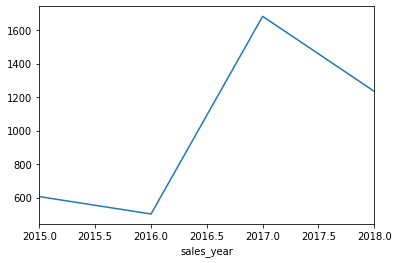

In [70]:
sales_games['count'].plot()

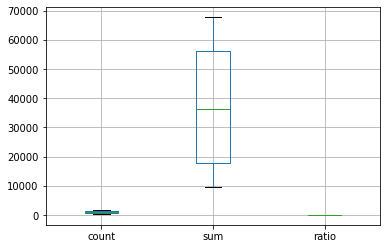

In [71]:
plt.figure()
bp = sales_games.boxplot()

In [72]:
trade = data_games[['online', 'offline']]

<Figure size 432x288 with 0 Axes>

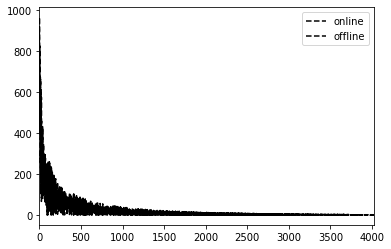

In [73]:
plt.figure()
trade.plot(style='k--', label='Series') 
plt.legend()

<Figure size 432x288 with 0 Axes>

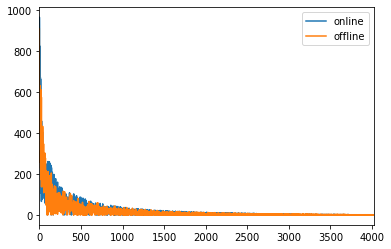

In [74]:
plt.figure() 
trade.plot() 
plt.legend(loc='best')

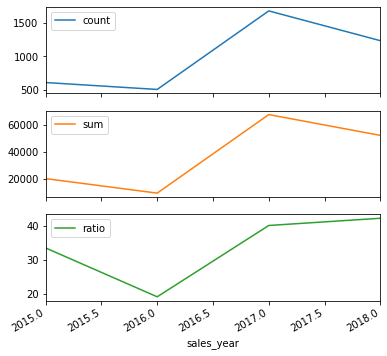

In [75]:
sales_games.plot(subplots=True, figsize=(6, 6)) 
plt.legend(loc='best')

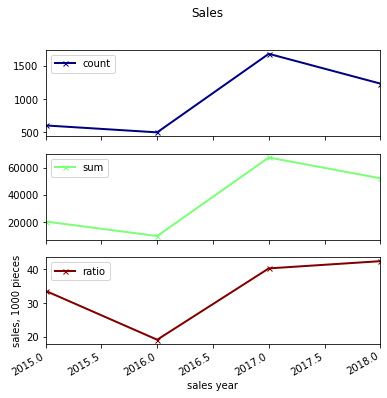

In [76]:
sales_games.plot(lw=2, colormap='jet', marker='x', markersize=5, title='Sales', subplots=True, figsize=(6, 6))
plt.xlabel('sales year')
plt.ylabel('sales, 1000 pieces')
plt.show()


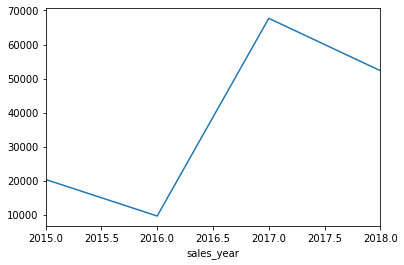

In [77]:
sales_games['sum'].plot(x_compat=True)

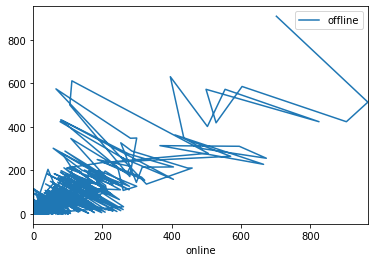

In [78]:
trade.plot(x='online', y='offline')

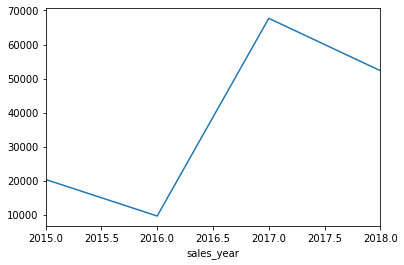

In [79]:
sales_games['sum'].plot()

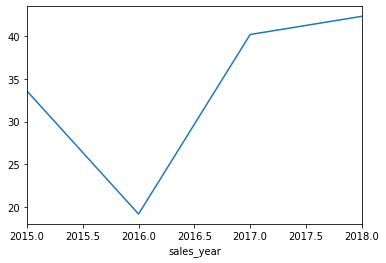

In [80]:
sales_games['ratio'].plot()

------------

# Комментарии

Хорошо :)

Можно было бы эти графики вывести в ряд, используя **subplot**, так их проще будет сравнивать и анализировать :)

Что нужно сделать для того, чтобы на графиках не отражались дробные значения года (ведь у нас есть значения только для полного года)?

------------

In [81]:
for year in sales_games.index:
     print(data_games[data_games['sales_year'] == year].describe())

       sales_year      online     offline  critic_score  user_score  \
count       606.0  606.000000  606.000000    225.000000  297.000000   
mean       2015.0   17.633663   15.960396     72.871111    6.665993   
std           0.0   48.709167   48.265708     12.437211    1.574165   
min        2015.0    0.000000    0.000000     19.000000    1.400000   
25%        2015.0    0.000000    0.000000     67.000000    5.900000   
50%        2015.0    2.000000    2.000000     74.000000    7.100000   
75%        2015.0   13.000000   12.000000     81.000000    7.800000   
max        2015.0  603.000000  612.000000     96.000000    9.300000   

            game_id  score_attitude  total_sales  
count    606.000000      221.000000   606.000000  
mean   30470.699670       11.057329    33.594059  
std    11578.951745        2.914575    90.419099  
min    10097.000000        5.588235     0.000000  
25%    20392.000000        9.438202     0.000000  
50%    30810.500000       10.256410     5.000000  
75%

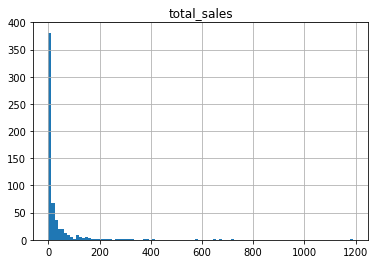

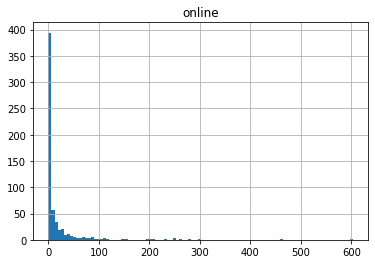

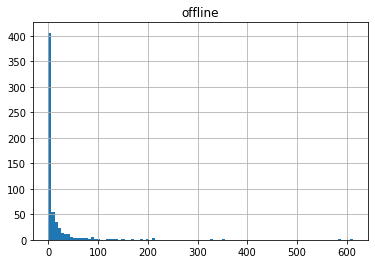

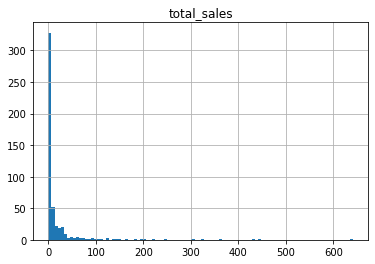

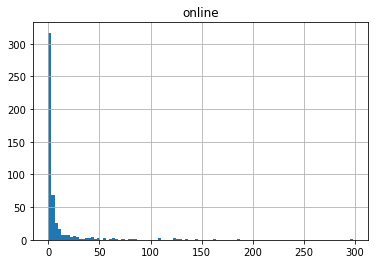

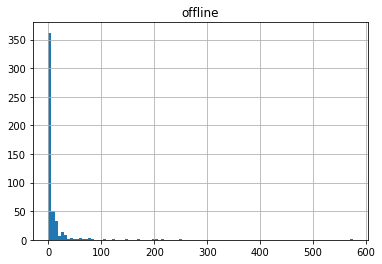

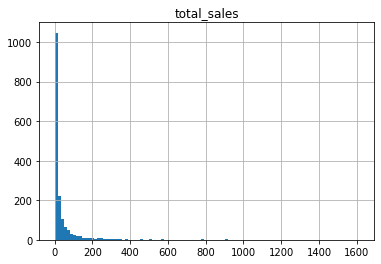

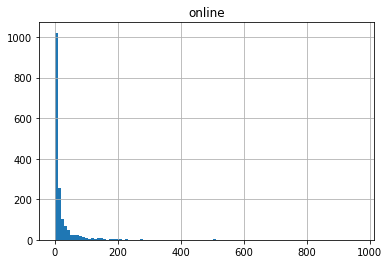

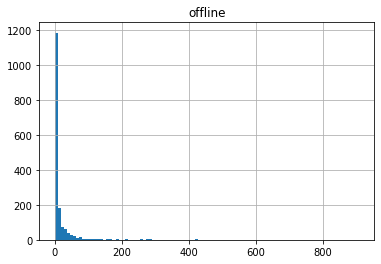

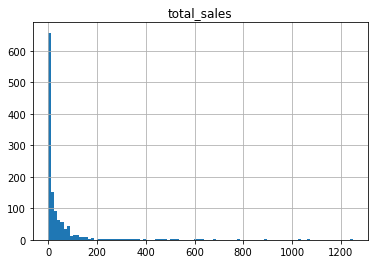

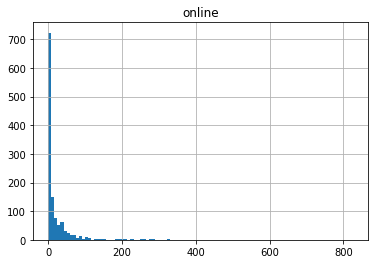

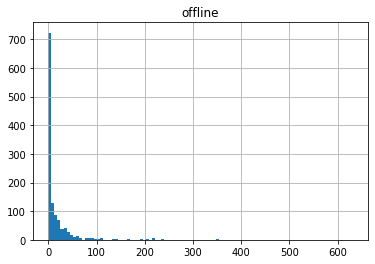

In [82]:
for year in sales_games.index:
    data_games[data_games['sales_year'] == year].hist('total_sales', bins = 100)
    data_games[data_games['sales_year'] == year].hist('online', bins = 100)
    data_games[data_games['sales_year'] == year].hist('offline', bins = 100)


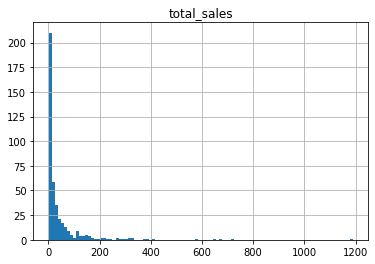

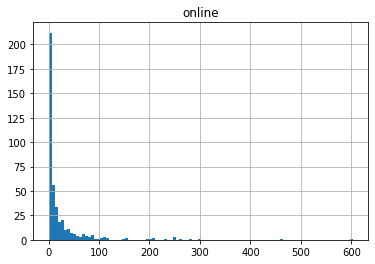

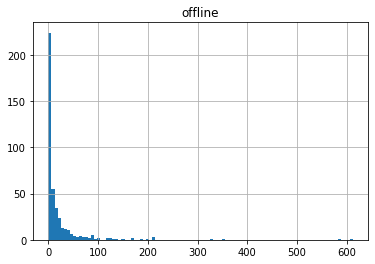

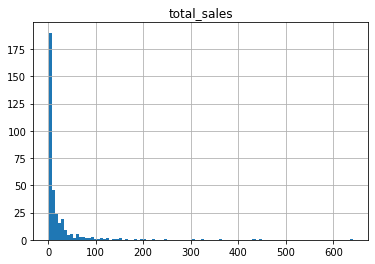

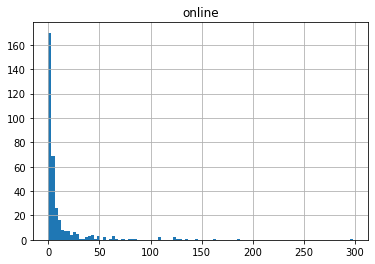

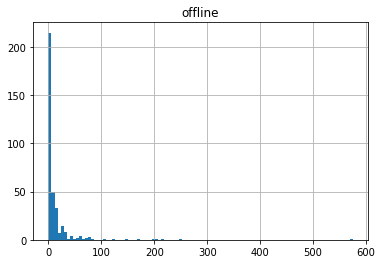

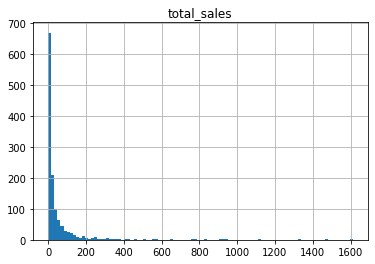

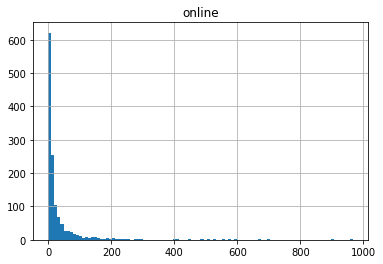

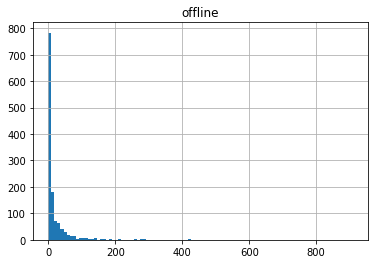

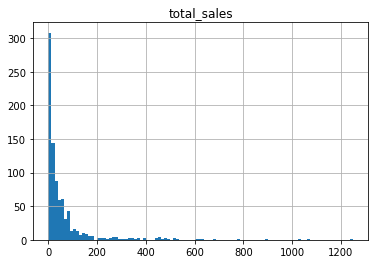

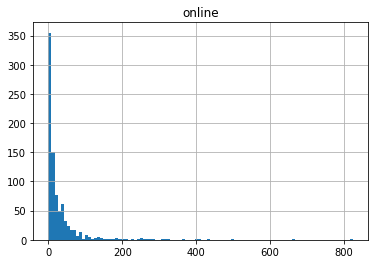

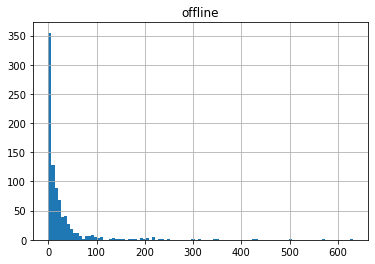

In [83]:
for year in sales_games.index:
    data_games[(data_games['sales_year'] == year) & (data_games['total_sales'] > 0)].hist('total_sales', bins = 100)
    data_games[(data_games['sales_year'] == year) &  (data_games['total_sales'] > 0)].hist('online', bins = 100)
    data_games[(data_games['sales_year'] == year) & (data_games['total_sales'] > 0)].hist('offline', bins = 100)

Вывод по 1 этапу
----
   1. В 2016 г. наблюдается падение продаж игр: это наблюдается как в обсалютно значении количество игр и общее количество продаж так и в относительном среднее количенсво продаж приходящихся н 1 игру. Сложно определить почему происходило падение продаж в количественной характеристики.
   2. С 2016 г. наблюдается улучшение качества продаж т.е. одна и таже игра продается большое количество раз. 
   3. В 2018 г. наблюдается общее падение продаж но увеличевается средние продажи, что может говорить о двух вещах:
      - растет вовлечение потребителей в компьютерные игры
      - данные за 2018 г. неполные и необходимо дождаться окончания года или сравнивать за равные промежутки времени.
   4. Доля __0__ продаж достаточно высока
   5. Доля небольших продаж высокая

------------

# Комментарии

Хорошо :)

Поработай над выводом графиков - постарайся выводит их не один под другим, а формировать матрицу из этих графиков (используй сабплоты и альтернативные группировки). Это упростить сравнение графиков, так как их больше количество будет возможно охватить одним взглядом :)

Не забывай подписывать оси графиков :)

Каие выводы можно сделать об онлайн и оффлайн продажах?

------------

------------

# Этап 2
Построить распределение по годам продажи для игр с отзывом и без отзыва; cравнить полученные распределения и сделать вывод

------------

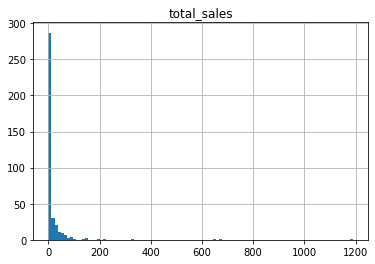

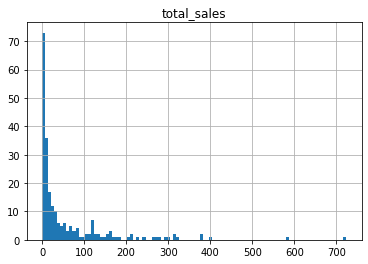

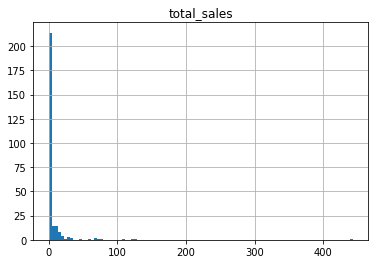

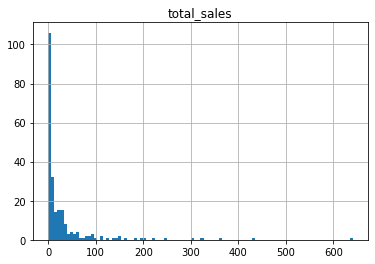

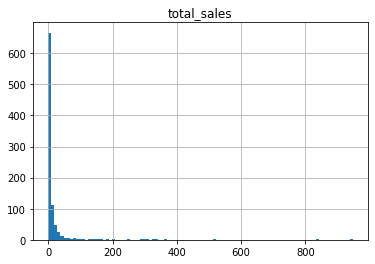

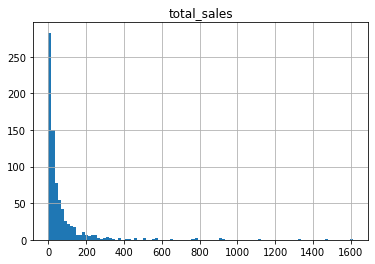

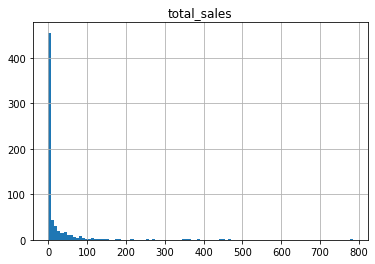

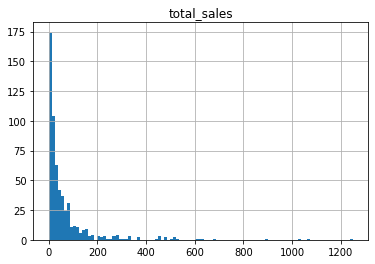

In [84]:
data_games['critic_score'] = data_games['critic_score'].astype(str)
for year in sales_games.index:
    data_games[(data_games['sales_year'] == year) & (data_games['critic_score'] == 'nan')].hist('total_sales', bins = 100)
    data_games[(data_games['sales_year'] == year) & (data_games['critic_score'] != 'nan')].hist('total_sales', bins = 100)
data_games['critic_score'] = pd.to_numeric(data_games['critic_score'], errors='coerce')

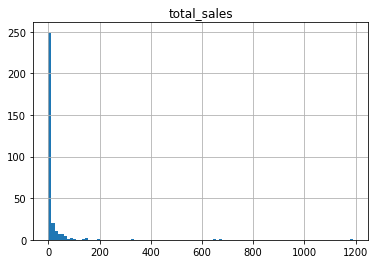

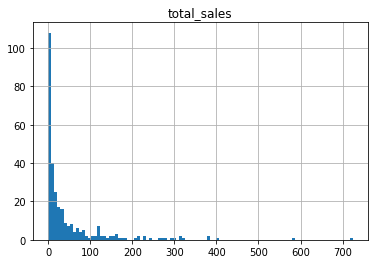

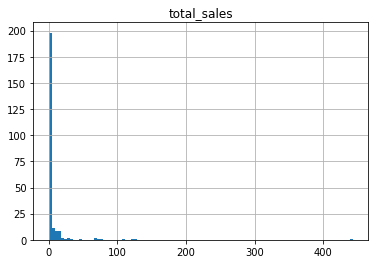

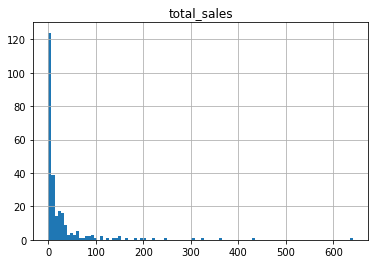

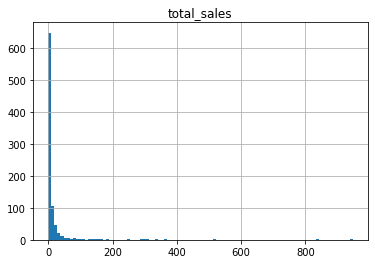

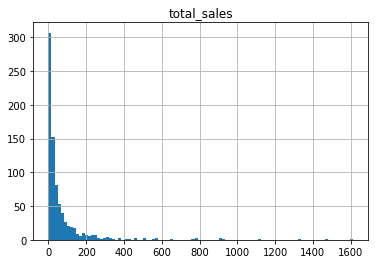

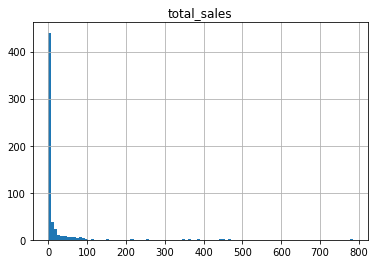

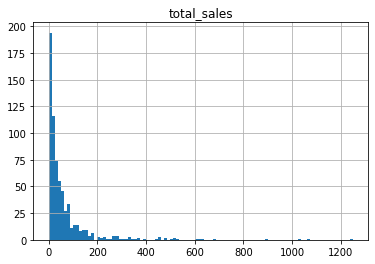

In [85]:
data_games['user_score'] = data_games['user_score'].astype(str)
for year in sales_games.index:
    data_games[(data_games['sales_year'] == year) & (data_games['user_score'] == 'nan')].hist('total_sales', bins = 100)
    data_games[(data_games['sales_year'] == year) & (data_games['user_score'] != 'nan')].hist('total_sales', bins = 100)
data_games['user_score'] = pd.to_numeric(data_games['user_score'], errors='coerce')

Вывод по Этапу 2
----
   1. В играх без оценки критиков и игроков продажи минимальны (хотя случаются исключения)
   2. В играх с оценками критиков и игроков продажи высоки 
   
__Вообще как могла пропустить система оценку игры, которую ни разу не скачивали. Значит:__
   1. Непонятен механизм наделения критериев оценки. Необходимо разобраться.
   2. У нас не полный DF
   3. В DF могут быть ошибки
   
   
__PS. Проверял с дополнением данных и без них__

------------

# Комментарии

Хорошо:)

Не забывай подпиывать оси графиков и давать содержательные названия (получается, что графики с отзывами и без них у тебя имеют одинаковые названия, что усложняет понимание, нужно помнить, что сначала идет график для данных без отзывов, а потом с отзывами ) :)

------------

------------

# Этап 3
Постройте ящик с усами по общим продажам, опишите полученный результат

------------

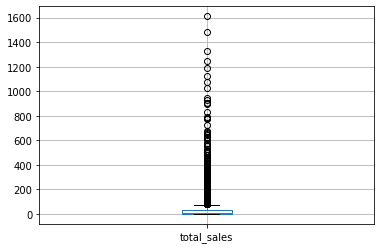

In [86]:
data_games.boxplot('total_sales')

In [87]:
data_games['total_sales'].describe()

count    4026.000000
mean       37.253353
std        99.359061
min         0.000000
25%         0.000000
50%         8.000000
75%        31.000000
max      1611.000000
Name: total_sales, dtype: float64

Вывод по этапу 3
---

   1. Как видно из графика и описания 25% игр не имеет продажд, еще 25% имеют от 0 до 8 продаж
   2. На продажи, которые меньше среднего приходится более 75%

------------

# Комментарии

Хорошо :) Какие выводы можно сделать для каждого отдельного года?

------------

Этап 4
----
Узнайте, на какой платформе было продано больше всего игр

In [88]:
sales_platform = data_games.pivot_table(index='platform', values='total_sales', aggfunc=['count', 'sum'])
sales_platform.columns = ['count', 'sum']
sales_platform.sort_values(by = 'count', ascending = False)

,count,sum
platform,,
ps3,708,33136.0
3ds,512,14392.0
x360,498,34390.0
psv,431,2554.0
ps4,393,24983.0
pc,389,8658.0
psp,312,396.0
xone,247,14471.0
wii,197,7816.0


In [89]:
sales_platform.sort_values(by = 'sum', ascending = False)

,count,sum
platform,,
x360,498,34390.0
ps3,708,33136.0
ps4,393,24983.0
xone,247,14471.0
3ds,512,14392.0
pc,389,8658.0
wii,197,7816.0
wiiu,147,6323.0
ds,185,2837.0


Вывод по Этапу 4
---
   1. Разнообразие игр лучше всего воспринимаятся для платформ __PS3, 3ds, x360___
   2. Лучше продаются на платформах  __x360, PS3, PS3__

------------

# Комментарии

Хорошо :)

Можно также говорить и о том, что на платформе x360 игры одни из самых дорогих, да?

------------

Этап 5
----
Определите, игр какой категории больше всего

In [90]:
sales_rating = data_games.pivot_table(index='rating', values='total_sales', aggfunc=['count', 'sum'])
sales_rating.columns = ['count', 'sum']
sales_rating['ratio'] = sales_rating['sum'] / sales_rating['count']
sales_rating.sort_values(by = 'count', ascending = False)

,count,sum,ratio
rating,,,
m,624,56519.0,90.575321
e,620,31242.0,50.390323
t,616,19229.0,31.215909
e10+,458,19724.0,43.065502
80,1,18.0,18.000000
ec,1,42.0,42.000000
rp,1,3.0,3.000000


Вывод по Этапу 5
----
   1. Наилучшие результаты с минимальной разбежкой являются категории:
      - от 17 лет
      - для всех
      - подросткам 13—19 лет
   2. Затем идет категория _для всех старше 10 лет_ 
   3. Аутсайдеры _для детей младшего возраста_

------------

# Комментарии

Хорошо :)

------------

Этап 6
----
Определите, игр какого жанра больше всего

In [91]:
sales_rating = data_games.pivot_table(index='genre', values='total_sales', aggfunc=['count', 'sum'])
sales_rating.columns = ['count', 'sum']
sales_rating['ratio'] = sales_rating['sum'] / sales_rating['count']
sales_rating.sort_values(by = 'count', ascending = False)

,count,sum,ratio
genre,,,
action,1270,43004.0,33.861417
role-playing,467,14608.0,31.280514
adventure,410,2872.0,7.004878
sports,389,19718.0,50.688946
misc,375,10941.0,29.176000
shooter,329,34245.0,104.088146
racing,180,7256.0,40.311111
fighting,159,4787.0,30.106918
simulation,137,3536.0,25.810219


In [92]:
sales_rating.sort_values(by = 'sum', ascending = False)

,count,sum,ratio
genre,,,
action,1270,43004.0,33.861417
shooter,329,34245.0,104.088146
sports,389,19718.0,50.688946
role-playing,467,14608.0,31.280514
misc,375,10941.0,29.176000
racing,180,7256.0,40.311111
platform,122,6835.0,56.024590
fighting,159,4787.0,30.106918
simulation,137,3536.0,25.810219


In [93]:
sales_rating.sort_values(by = 'ratio', ascending = False)

,count,sum,ratio
genre,,,
shooter,329,34245.0,104.088146
platform,122,6835.0,56.024590
sports,389,19718.0,50.688946
racing,180,7256.0,40.311111
action,1270,43004.0,33.861417
role-playing,467,14608.0,31.280514
fighting,159,4787.0,30.106918
misc,375,10941.0,29.176000
simulation,137,3536.0,25.810219


Вывод Этап 6
---
   1. Наибольшее число игр пишется в жанрах:
      - action
      - role-playing
      - adventure
   2. Лучший объем продаж имеют игры в жанрах:
      - action
      - shooter
      - sports
   3. Лучшие эффективные продажи. т.е. средние продажи на одну игру:
      - shooter
      - platform
      - sports 

------------

# Комментарии

Отлично :)

------------

Этап 7
----
Найдите игры с наибольшей и наименьшей оценкой от критиков

In [94]:
data_games.loc[data_games['critic_score'] == data_games['critic_score'].min()]

,platform,sales_year,genre,online,offline,critic_score,user_score,rating,game_id,score_attitude,total_sales
3026,ps3,2017,racing,2.0,1.0,13.0,1.0,m,28618,13.0,3.0


In [95]:
data_games.loc[data_games['critic_score'] == data_games['critic_score'].max()]

,platform,sales_year,genre,online,offline,critic_score,user_score,rating,game_id,score_attitude,total_sales
0,ps3,2017,action,702.0,909.0,97.0,8.2,m,20838,11.829268,1611.0
1,x360,2017,action,966.0,514.0,97.0,8.1,m,48673,11.975309,1480.0
9,ps4,2018,action,396.0,631.0,97.0,8.3,m,28618,11.686747,1027.0
44,xone,2018,action,281.0,219.0,97.0,7.9,m,39055,12.278481,500.0


Вывод Этап 7
----
   1. Игра с низкой оценкой критиков имеет небольшей объем продаж. Который ниже мидианного
   2. Игра с высокой оценкой критиков имет большие объемы продаж.

------------

# Комментарии

Хорошо :)

------------

Этап 8
----
Найдите игры с наибольшей и наименьшей оценкой от пользователей

In [96]:
data_games.loc[data_games['user_score'] == data_games['user_score'].min()]

,platform,sales_year,genre,online,offline,critic_score,user_score,rating,game_id,score_attitude,total_sales
2118,ps3,2016,sports,7.0,2.0,NaN,0.2,e,23493,NaN,9.0


In [97]:
data_games.loc[data_games['user_score'] == data_games['user_score'].max()]

,platform,sales_year,genre,online,offline,critic_score,user_score,rating,game_id,score_attitude,total_sales
639,pc,2015,role-playing,21.0,46.0,93.0,9.3,m,12365,10.000000,67.0
2348,psv,2015,adventure,0.0,3.0,86.0,9.3,m,38270,9.247312,3.0


Выводы Этап 8
------
Ориентироваться на оценку игр от пользователей достаточно сложно. Так как он не так не сильно влияет на олбъем продаж. Так мы видем, что игры с минимальной оценкой от пользователей по своим продажам могут быть больше, чем с максимальными баллами.

------------

# Комментарии

Хорошо :)

------------

Этап 9
-----
Оцените корреляцию между оценками критиков и пользовательскими оценками

In [98]:
data_games.corr()

,sales_year,online,offline,critic_score,user_score,game_id,score_attitude,total_sales
sales_year,1.000000,0.054330,0.036887,-0.028688,0.008295,0.005149,-0.019506,0.049096
online,0.054330,1.000000,0.779712,0.307723,0.014490,-0.008784,0.226045,0.952622
offline,0.036887,0.779712,1.000000,0.309867,0.003727,-0.001489,0.232218,0.933215
critic_score,-0.028688,0.307723,0.309867,1.000000,0.534847,-0.008001,0.198332,0.329177
user_score,0.008295,0.014490,0.003727,0.534847,1.000000,0.004639,-0.646972,0.010212
game_id,0.005149,-0.008784,-0.001489,-0.008001,0.004639,1.000000,-0.010753,-0.005764
score_attitude,-0.019506,0.226045,0.232218,0.198332,-0.646972,-0.010753,1.000000,0.244096
total_sales,0.049096,0.952622,0.933215,0.329177,0.010212,-0.005764,0.244096,1.000000


Вывод
----
Между оценкой экспертов и оценкой потребителей существует прямая средняя линейная всязь

------------

# Комментарии

Хорошо :)

------------

Резюме о проделанной работе
-----
   1. В 2016 г. наблюдается падение продаж игр: это наблюдается как в обсалютно значении количество игр и общее количество продаж так и в относительном среднее количенсво продаж приходящихся н 1 игру. Сложно определить почему происходило падение продаж в количественной характеристики.
   2. С 2016 г. наблюдается улучшение качества продаж т.е. одна и таже игра продается большое количество раз. 
   3. В 2018 г. наблюдается общее падение продаж но увеличевается средние продажи, что может говорить о двух вещах:
      - растет вовлечение потребителей в компьютерные игры
      - данные за 2018 г. неполные и необходимо дождаться окончания года или сравнивать за равные промежутки времени.
   4. Доля __0__ продаж достаточно высока
   5. Доля небольших продаж высокая
   6. В играх без оценки критиков и игроков продажи минимальны (хотя случаются исключения)
   7. В играх с оценками критиков и игроков продажи высоки 
   
__Вообще как могла пропустить система оценку игры, которую ни разу не скачивали. Значит:__
   - Непонятен механизм наделения критериев оценки. Необходимо разобраться.
   - У нас не полный DF
   - В DF могут быть ошибки
   
   8. Как видно из графика и описания 25% игр не имеет продажд, еще 25% имеют от 0 до 8 продаж
   9. На продажи, которые меньше среднего приходится более 75%
   10. Разнообразие игр лучше всего воспринимаятся для платформ __PS3, 3ds, x360___
   11. Лучше продаются на платформах  __x360, PS3, PS3__
   12. Наилучшие результаты с минимальной разбежкой являются категории:
      - от 17 лет
      - для всех
      - подросткам 13—19 лет
   13. Затем идет категория _для всех старше 10 лет_ 
   14. Аутсайдеры компьютерных игр _для детей младшего возраста_
   15. Наибольшее число игр пишется в жанрах:
      - action
      - role-playing
      - adventure
   16. Лучший объем продаж имеют игры в жанрах:
      - action
      - shooter
      - sports
   17. Лучшие средние продажи:
      - shooter
      - platform
      - sports 
   18. Ориентироваться на оценку игр от пользователей достаточно сложно. Так как он не так не сильно влияет на олбъем продаж. Так мы видем, что игры с минимальной оценкой от пользователей по своим продажам могут быть больше, чем с максимальными баллами.
   19. Между оценкой экспертов и оценкой потребителей существует прямая средняя линейная всязь

------------

# Комментарии

Отлично :)

------------

Шаг 3. Составить портрет пользователя для онлайн и офлайн продаж
-----
   1. Для покупателей интернет-магазина и сети розничных магазинов определить:
      - топ-5 предпочтительных жанров
      - в какие года пользователи были наиболее активны (больше всего покупали игры)
      - топ-5 предпочтительных платформ
      - какой рейтинг ESRB встречается чаще всего (наиболее частотная категория)

Этап 1 ответим на данные вопросы для сети розничных магазинов
-----

In [99]:
sales_platform_off = data_games.pivot_table(index='platform', values='offline', aggfunc=['count', 'sum'])
sales_platform_off.columns = ['count', 'sum']
sales_platform_off.sort_values(by = 'count', ascending = False)

,count,sum
platform,,
ps3,708,16310.0
3ds,512,6127.0
x360,498,11710.0
psv,431,1307.0
ps4,393,14109.0
pc,389,5670.0
psp,312,177.0
xone,247,5159.0
wii,197,2960.0


In [100]:
sales_platform_off.sort_values(by = 'sum', ascending = False)

,count,sum
platform,,
ps3,708,16310.0
ps4,393,14109.0
x360,498,11710.0
3ds,512,6127.0
pc,389,5670.0
xone,247,5159.0
wii,197,2960.0
wiiu,147,2513.0
psv,431,1307.0


In [101]:
sales_genre_off = data_games.pivot_table(index='genre', values='offline', aggfunc=['count', 'sum'])
sales_genre_off.columns = ['count', 'sum']
sales_genre_off.sort_values(by = 'count', ascending = False)

,count,sum
genre,,
action,1270,19912.0
role-playing,467,6230.0
adventure,410,1396.0
sports,389,8848.0
misc,375,3972.0
shooter,329,14802.0
racing,180,4058.0
fighting,159,1624.0
simulation,137,1972.0


In [102]:
sales_genre_off.sort_values(by = 'sum', ascending = False)

,count,sum
genre,,
action,1270,19912.0
shooter,329,14802.0
sports,389,8848.0
role-playing,467,6230.0
racing,180,4058.0
misc,375,3972.0
platform,122,3007.0
simulation,137,1972.0
fighting,159,1624.0


In [103]:
sales_games_offline = data_games.pivot_table(index='sales_year', values='offline', aggfunc=['count', 'sum'])
sales_games_offline.columns = ['count', 'sum']
sales_games_offline['ratio'] = sales_games['sum'] / sales_games['count']
sales_games_offline

,count,sum,ratio
sales_year,,,
2015,606,9672.0,33.594059
2016,502,5122.0,19.153386
2017,1683,28452.0,40.223411
2018,1235,23733.0,42.358704


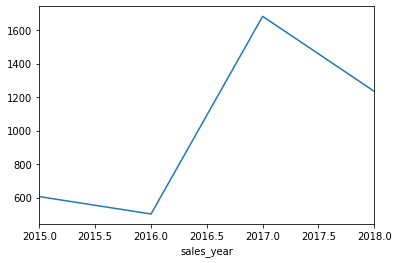

In [104]:
sales_games_offline['count'].plot()

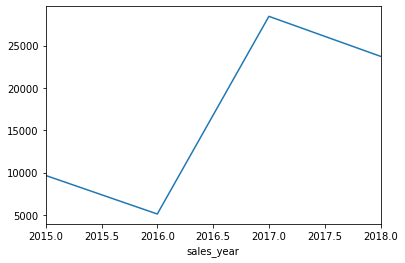

In [105]:
sales_games_offline['sum'].plot()

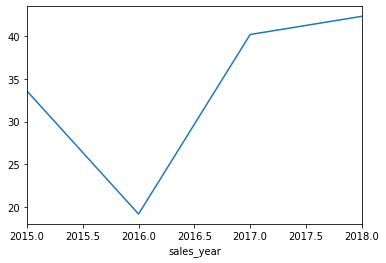

In [106]:
sales_games_offline['ratio'].plot()

In [107]:
sales_rating_off = data_games.pivot_table(index='rating', values='offline', aggfunc=['count', 'sum'])
sales_rating_off.columns = ['count', 'sum']
sales_rating_off['ratio'] = sales_rating_off['sum'] / sales_rating_off['count']
sales_rating_off.sort_values(by = 'sum', ascending = False)

,count,sum,ratio
rating,,,
m,624,25375.0,40.665064
e,620,14184.0,22.877419
t,616,8312.0,13.493506
e10+,458,7860.0,17.161572
80,1,4.0,4.000000
rp,1,3.0,3.000000
ec,1,0.0,0.000000


Вывод Этап 1
-----    
   1. Наибольшее число игр пишется в жанрах:
      - action
      - role-playing
      - adventure
      - sports
      - misc
   2. Лучший объем продаж имеют игры в жанрах:
       - action
       - shooter
       - sports
       - role-playing
       - racing
   3. Лучше всего пользователи покупали в 2017 г., при этом лучшие средние продажи приходились на 2018г.
   5. Платформы в куоторых лучше всего покупались игры:
         - ps3	16310.0 тыс. шт
         - ps4	14109.0 тыс. шт
         - x360	11710.0 тыс. шт
         - 3ds	6127.0 тыс. шт
         - pc	5670.0 тыс. шт
   6. Наилучшие результаты с минимальной разбежкой являются категории:
      - от 17 лет
      - для всех
      - подросткам 13—19 лет.      


Этап 2 Для онлайн продаж
-----

In [108]:
sales_platform_on = data_games.pivot_table(index='platform', values='online', aggfunc=['count', 'sum'])
sales_platform_on.columns = ['count', 'sum']
sales_platform_on.sort_values(by = 'sum', ascending = False)

,count,sum
platform,,
x360,498,22680.0
ps3,708,16826.0
ps4,393,10874.0
xone,247,9312.0
3ds,512,8265.0
wii,197,4856.0
wiiu,147,3810.0
pc,389,2988.0
ds,185,1913.0


In [109]:
sales_genre_on = data_games.pivot_table(index='genre', values='online', aggfunc=['count', 'sum'])
sales_genre_on.columns = ['count', 'sum']
sales_genre_on.sort_values(by = 'sum', ascending = False)

,count,sum
genre,,
action,1270,23092.0
shooter,329,19443.0
sports,389,10870.0
role-playing,467,8378.0
misc,375,6969.0
platform,122,3828.0
racing,180,3198.0
fighting,159,3163.0
simulation,137,1564.0


In [110]:
sales_genre_on.sort_values(by = 'count', ascending = False)

,count,sum
genre,,
action,1270,23092.0
role-playing,467,8378.0
adventure,410,1476.0
sports,389,10870.0
misc,375,6969.0
shooter,329,19443.0
racing,180,3198.0
fighting,159,3163.0
simulation,137,1564.0


In [111]:
sales_games_online = data_games.pivot_table(index='sales_year', values='online', aggfunc=['count', 'sum'])
sales_games_online.columns = ['count', 'sum']
sales_games_online['ratio'] = sales_games_online['sum'] / sales_games_online['count']
sales_games_online

,count,sum,ratio
sales_year,,,
2015,606,10686.0,17.633663
2016,502,4493.0,8.950199
2017,1683,39244.0,23.317885
2018,1235,28580.0,23.141700


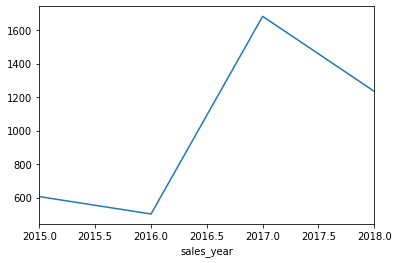

In [112]:
sales_games_offline['count'].plot()

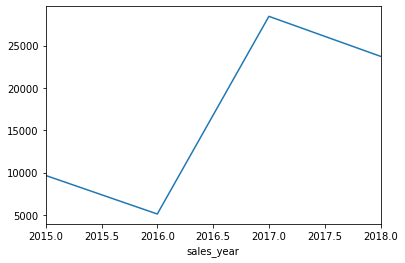

In [113]:
sales_games_offline['sum'].plot()

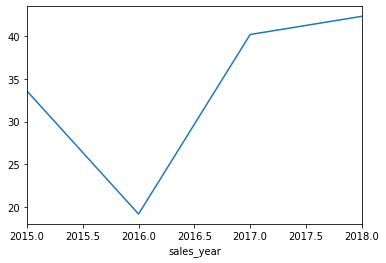

In [114]:
sales_games_offline['ratio'].plot()

In [115]:
sales_rating_on = data_games.pivot_table(index='rating', values='online', aggfunc=['count', 'sum'])
sales_rating_on.columns = ['count', 'sum']
sales_rating_on['ratio'] = sales_rating_on['sum'] / sales_rating_on['count']
sales_rating_on.sort_values(by = 'sum', ascending = False)

,count,sum,ratio
rating,,,
m,624,31144.0,49.910256
e,620,17058.0,27.512903
e10+,458,11864.0,25.903930
t,616,10917.0,17.722403
ec,1,42.0,42.000000
80,1,14.0,14.000000
rp,1,0.0,0.000000


In [116]:
data_ESRB.head(8)

,rating_type,decryption
0,e,для всех
1,m,от 17 лет
2,t,подросткам 13—19 лет
3,e10+,для всех старше 10 лет
4,k-a,для всех(до 1998 года)
5,ao,только для взрослых
6,ec,для детей младшего возраста
7,rp,рейтинг ожидается


Вывод Этап 2
-----
   1. Наибольшее число игр пишется в жанрах:
      - action
      - role-playing
      - adventure
      - sports
      - misc
   2. Лучший объем продаж имеют игры в жанрах:
      - action
      - shooter
      - sports
      - role-playing
      - misc
   3. Лучше всего пользователи покупали в 2017 г., при этом лучшие средние продажи приходились на 2018г.
   5. Платформы в куоторых лучше всего покупались игры:
      - x360	22680.0 тыс. шт
      - ps3		16826.0 тыс. шт
      - ps4		10874.0 тыс. шт
      - xone	9312.0 тыс. шт
      - 3ds		8265.0 тыс. шт
   6. Наилучшие результаты с минимальной разбежкой являются категории:
      - от 17 лет
      - для всех
      - подросткам 13—19 лет. 

------------

# Комментарии

Отлично :)

Что можно сказать о различиях в продажах онлайн и оффлайн?

Не забывай про оформление графиков :)

------------

Шаг 4. Проверить гипотезы
----
   1. Средний пользовательский рейтинг платформ PS2 и PS3 одинаковый;
   2. Средний пользовательский рейтинг жанров Action и Sports различается.


Этап 1. 
----
При определении пользовательского рейтинга платформ PS2 и PS3 
   - H0 - средний пользовательский рейтинг платформ PS2 и PS3 одинаковый
   - Н1 - средний пользовательский рейтинг платформ PS2 и PS3 не равен
   - Пороговое значение alpha 5%

------------

# Комментарии

Хорошо :)

В формулировке нулевой гипотезы слово "одинаковый" следует заменить на "равен" :)

------------

In [117]:
alpha = 0.05
if (st.ttest_ind(data_games[data_games['platform'] == 'ps2'].user_score, data_games[data_games['platform'] == 'ps3'].user_score).pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")





Не получилось отвергнуть нулевую гипотезу


------------

# Комментарии

Хорошо :)

------------

При определении соотвествия среднего  пользовательский рейтинга жанров Action и Sports различается
   - H0 - средний пользовательский рейтинг платформ Action и Sports одинаковый
   - Н1 - средний пользовательский рейтинг платформ Action и Sports не равен
   - Пороговое значение alpha 5%

In [118]:
alpha = 0.05
if (st.ttest_ind(data_games[data_games['genre'] == 'action'].user_score, data_games[data_games['genre'] == 'sports'].user_score).pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Не получилось отвергнуть нулевую гипотезу


Вывод 
----
 1. Средний рейтинг игр на платформах _PS3 и PS2_ __не отличаются__
 2. Средний ретинг игр в жанрах _action и sports_ __не отличается__

------------

# Комментарии

Отлично :) то есть нулевые гипотезы не подтвердились на 5%-ом уровне значимости.

------------

----------------------

# Общее Резюме о проделанной работе
   1. Открыты файл с данными и изучена общая информация. Подготовлены данные для анализа
      - Изучены данные, находящиеся по адресам:
         - /datasets/games_data.csv
         - /datasets/rating.csv
      - Выявлено, что существуют определенные несоотвествия в данных:
         - Пропущены даннеы в столбцах _critic_score, user_score, rating_
         - В столбце _critic_score_ присутсвуют данные _object_ __"tbd"__
         - Необьходимость изменить тип данных в столбце _sales_year_ на __int64__
      - В открытых источниках определены значение аббревиатуры "tbd" - "To be announced"
      - Не заполнены пропуски  в столбцах _user_score_ и _critic_score_, потому что это существенно искажаетданные при дальнейшем анализе
      - Пропуски в столбце _rating_ не заполняем, т.к. не достаточно данных для заполнения пропусков

__Вывод: данные, которые в столбце _user_score_ с записью "tbd" не существуют, но уже частично оценны и в скором времени будут заполненны__
  
__Частично данные можно заполнить имея название игр а не их ID__

   2. Провести исследовательский анализ данных:
      - В 2016 г. наблюдается падение продаж игр: это наблюдается как в обсалютно значении количество игр и общее количество продаж так и в относительном среднее количенсво продаж приходящихся н 1 игру. Сложно определить почему происходило падение продаж в количественной характеристики
      - С 2016 г. наблюдается улучшение качества продаж т.е. одна и таже игра продается большое количество раз в среднем.
      - В 2018 г. наблюдается общее падение продаж но увеличевается средние продажи, что может говорить о двух вещах:
         - растет вовлечение потребителей в компьютерные игры
         - данные за 2018 г. неполные и необходимо дождаться окончания года или сравнивать за равные промежутки времени.
      - Доля __0__ продаж достаточно высока
      - Доля небольших продаж высокая
      - В играх без оценки критиков и игроков продажи минимальны (хотя случаются исключения)
      - В играх с оценками критиков и игроков продажи высоки 
   
__Вообще как могла пропустить система оценку игры, которую ни разу не скачивали. Значит:__ Непонятен механизм наделения; критериев оценки. Необходимо разобраться; У нас не полный DF; В DF могут быть ошибки

     - Как видно из графика и описания 25% игр не имеет продажд, еще 25% имеют от 0 до 8 продаж
     - На продажи, которые меньше среднего приходится более 75%
     - Разнообразие игр лучше всего воспринимаятся для платформ __PS3, 3ds, x360___
     - Лучше продаются на платформах  __x360, PS3, PS3__
     - Наилучшие результаты с минимальной разбежкой являются категории:
        - от 17 лет
        - для всех
        - подросткам 13—19 лет
     - Затем идет категория _для всех старше 10 лет_ 
     - Аутсайдеры компьютерных игр _для детей младшего возраста_
     - Наибольшее число игр пишется в жанрах:
        - action
        - role-playing
        - adventure
     - Лучший объем продаж имеют игры в жанрах:
        - action
        - shooter
        - sports
     - Лучшие средние продажи:
        - shooter
        - platform
        - sports 
     - Ориентироваться на оценку игр от пользователей достаточно сложно. Так как он не так не сильно влияет на олбъем продаж. Так мы видем, что игры с минимальной оценкой от пользователей по своим продажам могут быть больше, чем с максимальными баллами.
     - Между оценкой экспертов и оценкой потребителей существует прямая средняя линейная всязь

   3. Составить портрет пользователя для ОФЛАЙН продаж
      - Наибольшее число игр пишется в жанрах:
        - action
        - role-playing
        - adventure
        - sports
        - misc
      - Лучший объем продаж имеют игры в жанрах:
         - action
         - shooter
         - sports
         - role-playing
         - racing
      - Лучше всего пользователи покупали в 2017 г., при этом лучшие средние продажи приходились на 2018г.
      - Платформы в куоторых лучше всего покупались игры:
         - ps3	16310.0 тыс. шт
         - ps4	14109.0 тыс. шт
         - x360	11710.0 тыс. шт
         - 3ds	6127.0 тыс. шт
         - pc	5670.0 тыс. шт
      - Наилучшие результаты с минимальной разбежкой являются категории:
        - от 17 лет
        - для всех
        - подросткам 13—19 лет.  
     4. Составить портрет пользователя для ОНЛАЙН продаж
        - Наибольшее число игр пишется в жанрах:
           - action
           - role-playing
           - adventure
           - sports
           - misc
         - Лучший объем продаж имеют игры в жанрах:
           - action
           - shooter
           - sports
           - role-playing
           - misc
         - Лучше всего пользователи покупали в 2017 г., при этом лучшие средние продажи приходились на 2018г.
         - Платформы в куоторых лучше всего покупались игры:
           - x360	22680.0 тыс. шт
           - ps3	16826.0 тыс. шт
           - ps4	10874.0 тыс. шт
           - xone	9312.0 тыс. шт
           - 3ds	8265.0 тыс. шт 
         - Наилучшие результаты с минимальной разбежкой являются категории:
            - от 17 лет
            - для всех
            - подросткам 13—19 лет
     5. Проверить гипотезы:
         - Средний рейтинг игр на платформах _PS3 и PS2_ __не отличаются__
         - Средний ретинг игр в жанрах _action и sports_ __не отличается__
        

----------------------

Выводы
----
   1. Среди игр моного тех, у которых _0_ продажи или продажи ниже 2 единиц в течении 4 лет
   2. Существовал провал в продажах в 2016 г. Однако быстро востановился в 2017 г и незначительно упал в 2018 г. Стоит заметить, что происходил рост средних продаж с 2016 по 2018 г.
   3. Для продаж важна оценка критеков игр при этом не так важна оценка игроков. Стоит также заметить среднее прямое влияние оценки критиков на оценку игроков и наоборот. 
   4. Анализируя портрет потребителя то видем следующие отличия:
      - немного отличаются жанры: на пятом месте у покупателей офлайн _racing_, у покупателей онлайн - misc
      - отличаются платформы для которых покупают потребители:
         - онлайн x360, ps3, ps4, xone, 3ds
         - офлайн ps3, ps4, x360, 3ds 6127.0, pc
   5. Средний рейтинг игр на платформах PS3 и PS2 не отличаются
   6. Средний ретинг игр в жанрах action и sports не отличается
   7. В основном продажи online превышают продажи offline

------------

# Комментарии

Отлично :)

В итоге, на продажи каких играх стоит сфокусироваться оффлайн и онлайн?

------------

------------

# Комментарии

Хорошая работа :)

Ты разобрался с материалом этого модуля - это здорово :) 

Для того, чтобы улучшить свой анализ, на этапе предобработки не забывай рассматривать все данные, содержащиеся в таблице (значения и распределения). 

Также, поработай над выводом графиком (их группировке и пояснениям (подписи осей и названий)), чтобы сделать их более читаемыми :) и не забывай обосновывать свои шаги :)

Надеюсь, что пройдя этот модуль, ты получил представление о том, что такое анализ данных и в чем заключается ежедневная работа аналитика с данными. Также, получил понимание того, как подступится к данным, с чего начать анализ и как получить ответы на интересующие тебя вопросы :) В следующих модулях ты будешь больше погружаться в детали работы и дополнять картину о работе аналитика :)

Если остались вопросы, пиши :)

***Успехов в следующем модуле !!!***

------------